# Part 4 Data Modelling with Holt-Winter

After applying ARIMA and FBProphet models, it's time to see how Holt-Winter performs with our data. We will start with <b>daily dataset</b> first.

In [34]:
# import necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error,  mean_absolute_error

Let's first start with PM2.5 data.

In [35]:
# load datasets
train_PM25 = pd.read_csv('dataset/daily/train/train_PM2.5.csv', parse_dates = [0], index_col = [0])
test_PM25 = pd.read_csv('dataset/daily/test/test_PM2.5.csv', parse_dates = [0], index_col = [0])

In [36]:
# print first few rows
train_PM25.head()

,PM2.5
Date-Time,
2013-03-01,6.458333
2013-03-02,28.750000
2013-03-03,104.750000
2013-03-04,22.875000
2013-03-05,131.833333


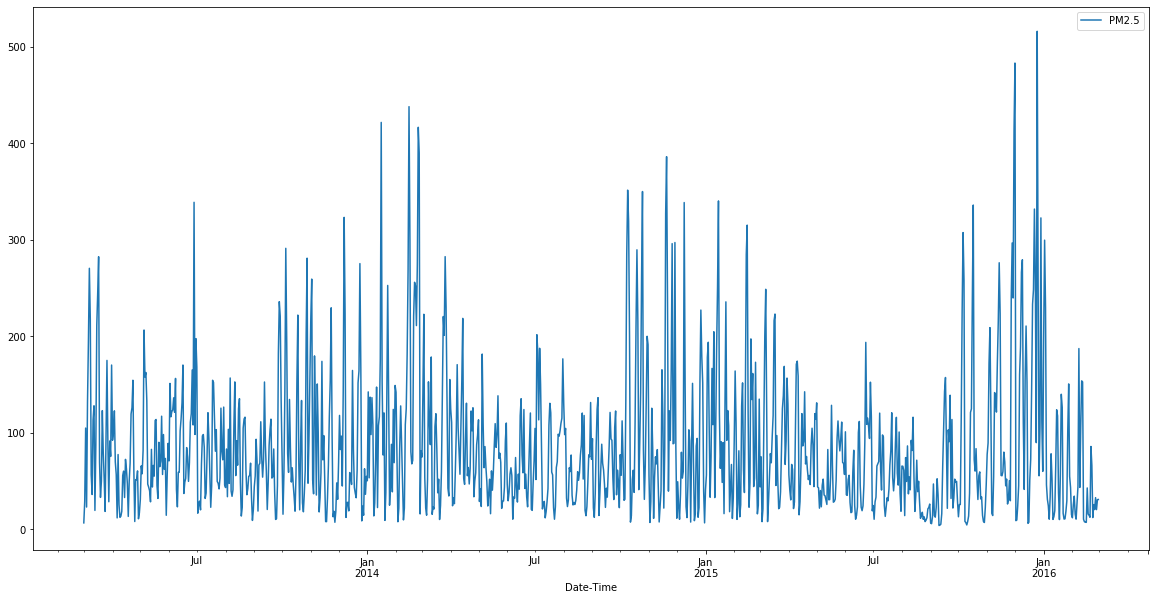

In [43]:
# lets plot our training data
train_PM25.plot(figsize = (20,10))

##### Holt-Winter on PM2.5 daily data.

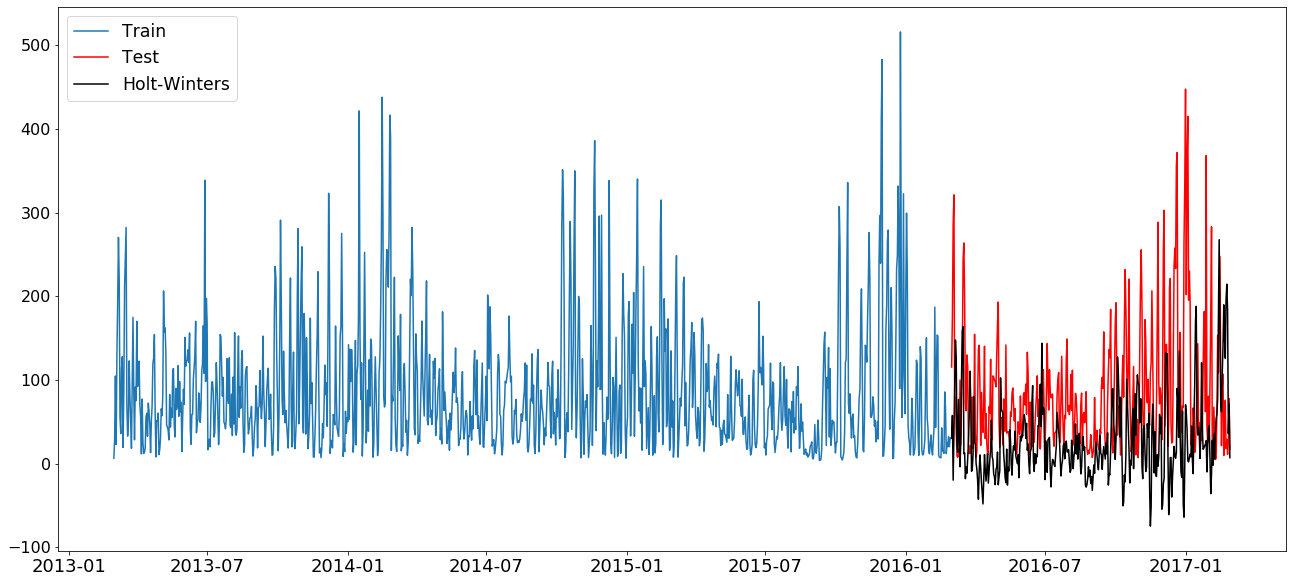

In [44]:
# fit the basic Holt-Winter model
# Since we have daily data with seasonal like fluctuations we will take seasonal_periods as 365
# Since the fluctuations are not high so we will take seasonal component as 'add'
model = ExponentialSmoothing(train_PM25, seasonal='add', seasonal_periods=365).fit()
# predict with the model
holt_pred = model.predict(start=test_PM25.index[0], end=test_PM25.index[-1])
# plot the results
plt.figure(figsize=(22, 10))
plt.plot(train_PM25.index, train_PM25, label='Train')
plt.plot(test_PM25.index, test_PM25, label='Test', color='r')
plt.plot(holt_pred.index, holt_pred, label='Holt-Winters', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

Since the fit was quite descent compared to rest of the statistic models, let's evaluate to see the results.

In [46]:
# model evaluation
actual = test_PM25
pred = holt_pred

# calcuate mean square error
mse = mean_squared_error(actual, pred)
# calculate mean absolute error
mae = mean_absolute_error(actual, pred)
# print results
print('The Mean Squared Error of PM2.5 forecasts is {}'.format(round(mse, 2)))
print('The Mean Absolute Error of PM2.5 forecasts is {}'.format(round(mae, 2)))
print('The Root Mean Squared Error of PM2.5 forecasts is {}'.format(np.sqrt(mse)))

The Mean Squared Error of PM2.5 forecasts is 11389.6
The Mean Absolute Error of PM2.5 forecasts is 76.12
The Root Mean Squared Error of PM2.5 forecasts is 106.72206272276625


The Results indicate that the fit was not proper, but let's try to compare it's performance with other pollutants data.